In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import random
from scipy.stats import anderson
from scipy.stats import expon
from scipy.stats import pareto
from scipy.stats import lognorm
from scipy.stats import weibull_min
from fitter import Fitter
from scipy.stats import kstest
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import exponweib
from scipy.stats import expon
from scipy.stats import pareto


In [222]:
dataframe = pd.read_csv('googleplaystore.csv')
dataframe = dataframe.dropna()
dataframe.head()

,App,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Sizept
0,Human Anatomy Atlas 2018: Complete 3D Human Body,4.5,2921,100000,1.0,25,0,24,2018,25.0
1,"Muscle Premium - Human Anatomy, Kinesiology, B...",4.2,168,10000,1.0,25,0,24,2017,25.0
3,Human Anatomy Atlas 2018: Complete 3D Human Body,4.5,2921,100000,1.0,25,0,24,2018,25.0
4,"Muscle Premium - Human Anatomy, Kinesiology, B...",4.2,168,10000,1.0,25,0,24,2017,25.0
6,Human Anatomy Atlas 2018: Complete 3D Human Body,4.5,2923,100000,1.0,25,0,24,2018,25.0


In [139]:
X = np.array(dataframe[["Rating", "Price", "Genres"]])
X.shape
dataframe[["Price", "Rating", "Genres"]].describe()

,Price,Rating,Genres
count,9333.000000,9333.000000,9333.000000
mean,0.280296,4.192178,23.303761
std,1.486500,0.515945,12.619781
min,0.000000,1.000000,0.000000
25%,0.000000,4.000000,14.000000
50%,0.000000,4.300000,24.000000
75%,0.000000,4.500000,35.000000
max,25.000000,5.000000,45.000000


In [140]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.25092656  0.27659574  3.91008922]
 [ 4.25996366  0.32404603 30.35735918]
 [ 4.16778639  0.16752799 14.38199828]
 [ 4.14697655  0.21143562 39.16001645]
 [ 4.17112772  0.52649457 22.47554348]]


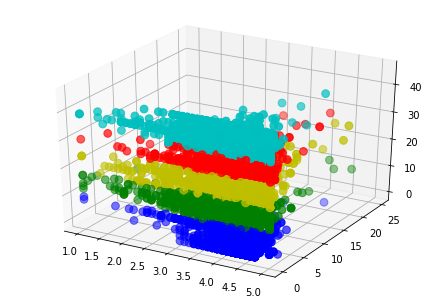

In [141]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores = {
    0:'b',
    1:'r',
    2:'g',
    3:'c',
    4:'y',
    5:'m',
    6:'k',
    7:'w',
}
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
#print(C[:,0], C[:,1])
#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='b', s=1000)

Fitted gamma distribution with error=31.91963416029919)
Fitted expon distribution with error=45.2808385292794)
Fitted weibull_min distribution with error=29.05947788534254)
Fitted lognorm distribution with error=31.314303700527102)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted pareto distribution with error=45.03852295992876)
{'weibull_min': (76595382.38917497, -28116109.40767868, 28116113.81665732)}
(1, 11.342299323191192, 0, 4.389010073769079)


,Rating
count,700.000000
mean,3.595279
std,0.921237
min,1.026554
25%,3.038401
50%,3.638117
75%,4.215174
max,6.216690


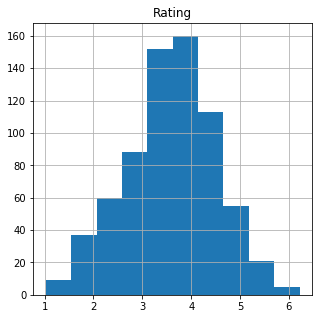

In [175]:
f = Fitter(dataframe['Rating'], distributions=['gamma', 'expon', 'weibull_min', 'lognorm', 'pareto'])
f.fit()
#f.summary()
print(f.get_best())

print(exponweib.fit(dataframe['Rating'], floc=0, f0=1))
rating = np.random.weibull(4.389010073769079,700)*4
d = {'Rating': rating}
df = pd.DataFrame(data=d)
df.hist(figsize = (5,5))
df.describe()


Fitted gamma distribution with error=10.628242970977082)
Fitted expon distribution with error=3.1590571615247574)
Fitted weibull_min distribution with error=12.278334575146237)
Fitted lognorm distribution with error=13.955361059010134)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted pareto distribution with error=13.955361059010134)
{'expon': (0.0, 0.28029572484731596)}


,Rating,Price
count,700.000000,700.000000
mean,3.595279,2.967642
std,0.921237,2.948086
min,1.026554,0.007892
25%,3.038401,0.825215
50%,3.638117,2.170901
75%,4.215174,4.131775
max,6.216690,20.306652


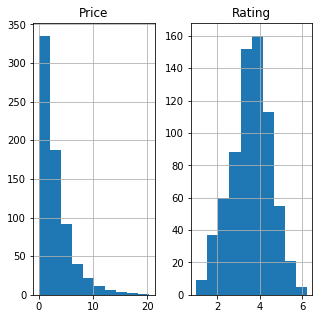

In [180]:
f = Fitter(dataframe['Price'], distributions=['gamma', 'expon', 'weibull_min', 'lognorm', 'pareto'])
f.fit()
#f.summary()
print(f.get_best())


#print(exponweib.fit(dataframe['Price'], floc=0, f0=1))
price = np.random.exponential(0.28029572484731596,700)*10
d = {'Rating': rating, 'Price': price}
df = pd.DataFrame(data=d)
df.hist(figsize = (5,5))
df.describe()

Fitted gamma distribution with error=0.13167716897210563)
Fitted expon distribution with error=0.14218674034245085)
Fitted weibull_min distribution with error=0.3049520785492233)
Fitted lognorm distribution with error=0.1317194053755367)
Fitted pareto distribution with error=0.1425778033122365)
{'gamma': (662.4285591816653, -302.82053181320396, 0.49227732356889625)}


,Rating,Price,Genres
count,700.000000,700.000000,700.000000
mean,3.595279,2.967642,13.094503
std,0.921237,2.948086,6.392304
min,1.026554,0.007892,0.933635
25%,3.038401,0.825215,8.300705
50%,3.638117,2.170901,12.327434
75%,4.215174,4.131775,16.906711
max,6.216690,20.306652,52.602653


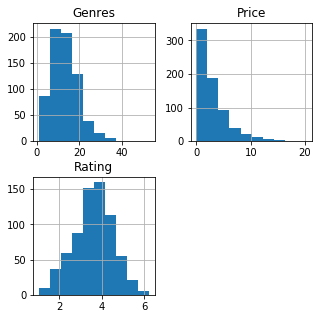

In [181]:
f = Fitter(dataframe['Genres'], distributions=['gamma', 'expon', 'weibull_min', 'lognorm', 'pareto'])
f.fit()
#f.summary()
print(f.get_best())


genres = np.random.gamma(4.389010073769079,0.49227732356889625 ,700)*6

np.around(genres)
d = {'Rating': rating, 'Price': price, 'Genres': genres}
df = pd.DataFrame(data=d)
df.hist(figsize = (5,5))
df.describe()

In [184]:
X = np.array(df[["Price", "Rating", "Genres"]])
cop = np.array(df[["Price", "Rating", "Genres"]])
df.head()

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 9.89989491  3.62263984 13.13561059]
 [ 2.12698126  3.65368876 12.7217476 ]
 [ 2.08396572  3.52934375 28.47775899]
 [ 2.63338804  3.47507821 18.9671795 ]
 [ 2.41002871  3.62164921  6.73531025]]


[[ 1.06577289  4.65915482 19.71396162]
 [ 3.11006392  3.93262335 15.3483975 ]
 [ 2.60101293  2.95023081 19.61617253]
 ...
 [ 3.08865745  2.68539867 17.60014012]
 [ 7.41593999  4.03743564 25.56777617]
 [ 1.78417471  5.26806285 15.29289336]]


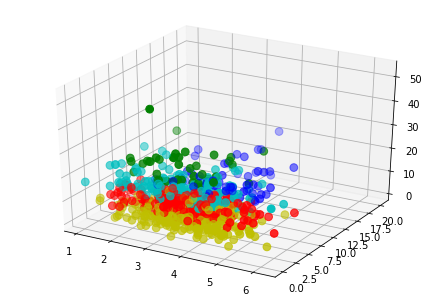

In [188]:

# Predicting the clusters
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = {
    0:'b',
    1:'r',
    2:'g',
    3:'c',
    4:'y',
    5:'m',
    6:'k',
    7:'w',
}
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
print(X)
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=asignar,s=60)




28


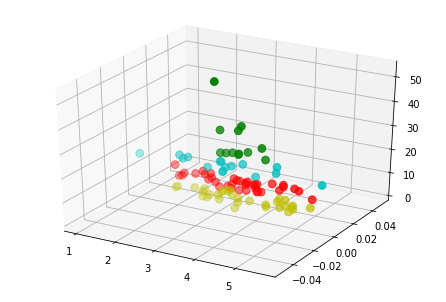

In [239]:
pricerange=[]
differentgenres=[]
for row in X:
    if(row[0]>=0 and row[0]<=0.5 and len(pricerange)<96):
        pricerange.append([math.floor(row[0]),row[1],row[2]])
        if(math.floor(row[2]) not in differentgenres):
            differentgenres.append(math.floor(row[2]))
            
print(len(differentgenres))
pricerange=np.array(pricerange);

# Predicting the clusters
labels = kmeans.predict(pricerange)

C = kmeans.cluster_centers_
colores = {
    0:'b',
    1:'r',
    2:'g',
    3:'c',
    4:'y',
    5:'m',
    6:'k',
    7:'w',
}
asignar1=[]
for row in labels:
    asignar1.append(colores[row])
    
fig = plt.figure()
ax1 = Axes3D(fig)
#print((price0_5).type)

ax1.scatter(pricerange[:, 1], pricerange[:, 0], pricerange[:, 2], c=asignar1,s=60)
        

33
96


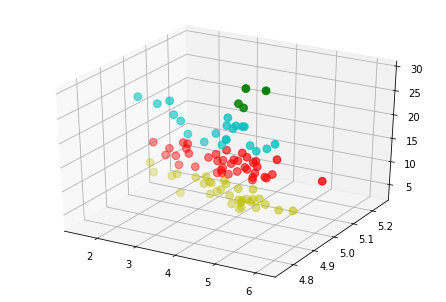

In [238]:
pricerange=[]
for row in X:
    if(row[0]>=5 and row[0]<=10):
        pricerange.append([5,row[1],row[2]])
        if(math.floor(row[2]) not in differentgenres):
            differentgenres.append(math.floor(row[2]))
            
print(len(differentgenres))
pricerange=np.array(pricerange);
print(len(pricerange))
# Predicting the clusters
labels = kmeans.predict(pricerange)

C = kmeans.cluster_centers_
colores = {
    0:'b',
    1:'r',
    2:'g',
    3:'c',
    4:'y',
    5:'m',
    6:'k',
    7:'w',
}
asignar1=[]
for row in labels:
    asignar1.append(colores[row])
    
fig = plt.figure()
ax2 = Axes3D(fig)
#print((price0_5).type)

ax2.scatter(pricerange[:, 1], pricerange[:, 0], pricerange[:, 2], c=asignar1,s=60)
        

In [173]:
df.loc[:, 'Price'] = 1000

In [174]:
df.describe()

,Rating,Price,Genres
count,700.000000,700.0,700.000000
mean,3.650027,1000.0,13.273371
std,0.952915,0.0,6.562062
min,0.598592,1000.0,1.928947
25%,3.042226,1000.0,8.536399
50%,3.652850,1000.0,12.325553
75%,4.300671,1000.0,16.580974
max,6.270653,1000.0,42.537733
